In [1]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Get Complex Sinusoid and Gaussian window functions

In [2]:
S = lambda x, omega : np.exp(1j*omega*x) 
G = lambda x, sigma : np.exp((-x**2)/(2*sigma**2))

Set hyperparameters

In [3]:
x = np.arange(-15, 15, 0.01)
octaves = 1
sigma = octaves*np.pi # set Gaussian window based on desired octaves
omega = np.pi/10 # np.pi/4 # frequency
alpha = np.pi/2

Get Signals

In [25]:
signal = S(x, omega) * G(x, sigma) 
shifted = S(x, omega) * G(x, sigma) * np.exp(1j*omega*alpha)

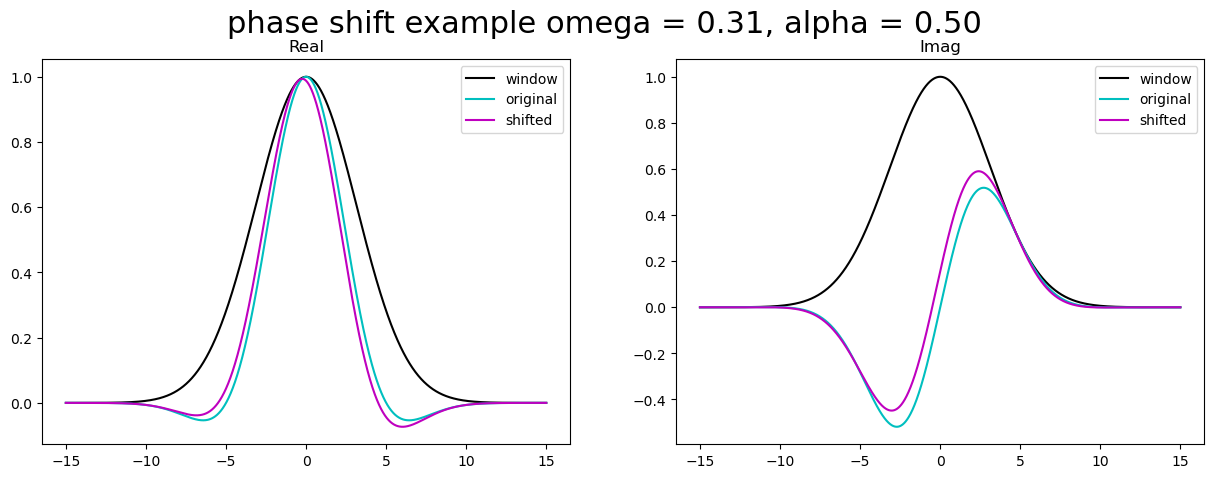

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle(f"phase shift example omega = {omega:.2f}, alpha = {alpha:.2f}", size=22)

ax[0].set_title("Real")
ax[0].plot(x, np.abs(signal), c='k', label='window')
ax[0].plot(x, np.real(signal), c='c', label='original')
ax[0].plot(x, np.real(shifted), c='m', label='shifted')
ax[0].legend();

ax[1].set_title("Imag")
ax[1].plot(x, np.abs(signal), c='k', label='window')
ax[1].plot(x, np.imag(signal), c='c', label='original')
ax[1].plot(x, np.imag(shifted), c='m', label='shifted')
ax[1].legend();

In [118]:
alpha_vals = np.arange(0, 2*np.pi, 0.025)

for i, alpha_val in enumerate(alpha_vals):
    f_shifted = S(x, omega) * G(x, sigma) * np.exp(1j*omega*alpha_val)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    fig.suptitle(f"phase shift example alpha = {alpha_val:.2f}", size=22)

    ax[0].set_title("Real")
    ax[0].plot(x, np.abs(signal), c='k', label='window')
    ax[0].plot(x, np.real(signal), c='c', label='original')
    ax[0].plot(x, np.real(f_shifted), c='m', label='shifted')
    ax[0].legend();

    ax[1].set_title("Imag")
    ax[1].plot(x, np.abs(signal), c='k', label='window')
    ax[1].plot(x, np.imag(signal), c='c', label='original')
    ax[1].plot(x, np.imag(f_shifted), c='m', label='shifted')
    ax[1].legend();

    fig.savefig(f"plots/plot_{i}.png")
    plt.close();

In [119]:
image_paths = sorted(glob(os.path.join("plots", '*.png')))
image_paths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
pil_images = [Image.open(im_path) for im_path in image_paths]
pil_images[0].save("shifts.gif", format='GIF', append_images=pil_images,
                    save_all=True, duration=50, loop=0)

remove images

In [121]:
for im_path in image_paths:
    os.remove(im_path)

## **Compare Different Frequencies**

In [136]:
x = np.arange(-15, 15, 0.01)
octaves = 1
sigma = octaves*np.pi # set Gaussian window based on desired octaves
omega1 = 0.2  # frequency
omega2 = 1.0 # frequency
alpha = np.pi/2

In [137]:
signal_1 = S(x, omega1) * G(x, sigma) 
signal_2 = S(x, omega2) * G(x, sigma) 

In [160]:
# get alpha values
alpha_vals = np.arange(0, np.pi, 0.02)

# get initial signal peaks
peak1 = signal_1.max()
peak2 = signal_2.max()


for i, alpha_val in enumerate(alpha_vals):

    # get shifts
    shift1 = np.exp(1j*omega1*alpha_val)
    shift2 = np.exp(1j*omega2*alpha_val)

    # get shifted signals
    f_shifted_1 = signal_1 * shift1 
    f_shifted_2 = signal_2 * shift2

    # get real portions
    f_shifted_1_real = np.real(f_shifted_1)
    f_shifted_2_real = np.real(f_shifted_2)

    # get shifted peak locations (peak only)
    shift_loc_1 = f_shifted_1_real == f_shifted_1_real.max()
    shift_loc_2 = f_shifted_2_real == f_shifted_2_real.max()

    # get attenuation factors
    atten1 = f_shifted_1_real[shift_loc_1][0]
    atten2 = f_shifted_2_real[shift_loc_2][0]

    # plot
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f"phase shift example alpha = {alpha_val:.2f}", size=22)

    ax[0].set_title(f"Omega = {omega1:.2f}, Attenuation = {atten1:.4f}")
    ax[0].plot(x, np.abs(signal_1), c='k', label='window')
    ax[0].plot(x, np.real(signal_1), c='c', label='original')
    ax[0].plot(x, f_shifted_1_real, c='m', label='shifted')
    ax[0].plot(x[shift_loc_1], f_shifted_1_real[shift_loc_1], '-o', c='g')
    ax[0].legend();

    ax[1].set_title(f"Omega = {omega2:.2f}, Attenuation = {atten2:.4f}")
    ax[1].plot(x, np.abs(signal_2), c='k', label='window')
    ax[1].plot(x, np.real(signal_2), c='c', label='original')
    ax[1].plot(x, f_shifted_2_real, c='m', label='shifted')
    ax[1].plot(x[shift_loc_2], f_shifted_2_real[shift_loc_2], '-o', c='g')
    ax[1].legend();

    plt.tight_layout()
    fig.savefig(f"plots/plot_{i}.png")
    plt.close();


In [161]:
image_paths = sorted(glob(os.path.join("plots", '*.png')))
image_paths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
pil_images = [Image.open(im_path) for im_path in image_paths]
pil_images[0].save("multifrequency_shifts.gif", format='GIF', append_images=pil_images,
                    save_all=True, duration=50, loop=0)

In [ ]:
# remove images
for im_path in image_paths:
    os.remove(im_path)

## **Compare Multiple Octaves**

In [4]:
x = np.arange(-50, 50, 0.01)
octave_vals = [1, 2, 4] # full, half, quarter

# std dev for Gaussian windows of different Octaves
sigma_full = 1*np.pi
sigma_half = 2*np.pi
sigma_quarter = 4*np.pi

omega = np.pi/4 # frequency

signal_full = S(x, omega) * G(x, sigma_full) 
signal_half = S(x, omega) * G(x, sigma_half) 
signal_quarter = S(x, omega) * G(x, sigma_quarter) 

signals = {"Full" : signal_full,
           "Half" : signal_half,
           "Quarter" : signal_quarter}

In [163]:
# fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# fig.suptitle(f"Phase shift at different Octaves", size=22)

# ax[0, 0].set_title("Real")
# ax[0, 0].plot(x, np.abs(signal_full), c='k', label='window')
# ax[0, 0].plot(x, np.real(signal_full), c='c', label='original')
# # ax[0, 0].plot(x, np.real(shifted_full), c='m', label='shifted')
# ax[0, 0].legend();

# ax[0, 1].set_title("Imag")
# ax[0, 1].plot(x, np.abs(signal_full), c='k', label='window')
# ax[0, 1].plot(x, np.imag(signal_full), c='c', label='original')
# # ax[0, 1].plot(x, np.imag(shifted_full), c='m', label='shifted')
# ax[0, 1].legend();

In [5]:
for a_idx, alpha_val in enumerate(np.arange(0.0, 3*np.pi, 0.02)):

    fig, ax = plt.subplots(1, 3, figsize=(25, 5))
    fig.suptitle(f"Phase shifts at different Octaves alpha = {alpha_val:.2f}", size=22)

    for i, (key, sig) in enumerate(signals.items()):

        # get shifted signal
        shifted = sig * np.exp(1j*omega*alpha_val)

        ax[i].plot(x, np.abs(sig), c='k', label='window')
        ax[i].plot(x, np.real(sig), c='c', label='original')
        ax[i].plot(x, np.real(shifted), c='m', label='shifted')
        ax[i].set_title(f"{key} Octave", size=18)
        ax[i].set_ylabel("Intensity")
        ax[i].set_xlabel("Space")
        ax[i].legend();

    plt.tight_layout();
    plt.savefig(f"plots/plot_{a_idx}.png")
    plt.close();

In [6]:
image_paths = sorted(glob(os.path.join("plots", '*.png')))
image_paths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
pil_images = [Image.open(im_path) for im_path in image_paths]
pil_images[0].save("multioctave_shifts.gif", format='GIF', append_images=pil_images,
                    save_all=True, duration=50, loop=0)

In [81]:
# remove images
for im_path in image_paths:
    os.remove(im_path)

## **Example with localized functions**

Use shiftable Sinusoid and Gaussian Window

In [21]:
Sd = lambda x, omega, d : np.exp(1j*omega*(x - d)) 
Gd = lambda x, sigma, d: np.exp((-(x - d)**2)/(2*sigma**2))

In [67]:
sigma = 10*np.pi

signal_1 = Sd(x, omega, 0) * Gd(x, sigma, 0) 
signal_2 = Sd(x, omega, d=0.0) * Gd(x, sigma, d=0.0) * Gd(x, sigma/4, -3.0) 

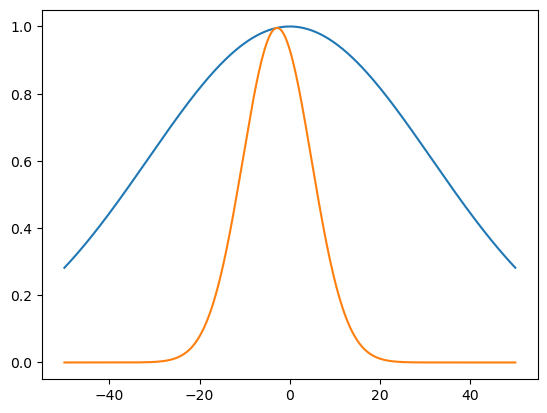

In [68]:
plt.plot(x, np.abs(signal_1))
plt.plot(x, np.abs(signal_2))

# plt.plot(x, np.real(signal_2))
# plt.plot(np.real(signal_2 * np.exp(1j*omega*5.0)))

In [69]:
sigma_full = 1*np.pi
sigma_half = 2*np.pi
sigma_quarter = 4*np.pi

omega = np.pi/4 # frequency

signal_full = Sd(x, omega, 0) * Gd(x, sigma_full, 0) 
signal_half = Sd(x, omega, 0) * Gd(x, sigma_half, 0) 
signal_quarter = Sd(x, omega, 0) * Gd(x, sigma_quarter, 0) 

In [73]:
sigmas = {"Full" : sigma_full,
          "Half" : sigma_half,
          "Quarter" : sigma_quarter}

signals = {"Full" : signal_full,
           "Half" : signal_half,
           "Quarter" : signal_quarter}

In [95]:
for a_idx, alpha_val in enumerate(np.arange(0, 20, 0.05)): # np.arange(1.0, 3*np.pi, 0.02)):

    fig, ax = plt.subplots(1, 3, figsize=(25, 5))
    fig.suptitle(f"Phase shifts at different Octaves alpha = {alpha_val:.2f}", size=22)

    for i, (key, sig) in enumerate(signals.items()):

        # get shifted signal
        shifted = np.abs(sig * Gd(x, sigmas[key], alpha_val)) 

        ax[i].plot(x, np.abs(sig), c='k', label='window')
        ax[i].plot(x, shifted, c='m', label='shifted')
        ax[i].set_title(f"{key} Octave - attenuation = {shifted.max():.2f}", size=18)
        ax[i].set_ylabel("Intensity")
        ax[i].set_xlabel("Space")
        ax[i].legend();

    plt.tight_layout();
    plt.savefig(f"plots/plot_{a_idx}.png")
    plt.close();
    # print(STOP)

In [ ]:
image_paths = sorted(glob(os.path.join("plots", '*.png')))
image_paths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
pil_images = [Image.open(im_path) for im_path in image_paths]
pil_images[0].save("multioctave_localized_shifts.gif", format='GIF', append_images=pil_images,
                    save_all=True, duration=50, loop=0)

In [94]:
# remove images
for im_path in image_paths:
    os.remove(im_path)